Approach:

1. Load csv
2. Clean data set
3. Conduct EDA

## 1 Load csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('real_estate_listings.csv')
df

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249.000 €,64 m²,3,3.57,13505,1971,2
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1.295.000 €,"136,06 m²",4,3.57,10405,1900,5
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770.000 €,120 m²,4,3.57,12161,1900,5
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349.000 €,158 m²,5,Prov,12103,Altbau,dachbodenWohnungslage4
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494.990 €,126 m²,4,Prov,12157,1909,3
...,...,...,...,...,...,...,...,...,...,...
4937,https://www.immowelt.de/expose/2gd5v4m,Fernwärme,"Fußbodenheizung,",429.000 €,78 m²,3,3 %,13595,2000,1
4938,https://www.immowelt.de/expose/2ga5t4m,Gas,Zentralheizung,729.000 €,150 m²,4,3%,13467,1990,rassenwohnungWohnungslageErdgeschossBezugSofort
4939,https://www.immowelt.de/expose/2f79g4a,Gas,Etagenheizung,695.600 €,94 m²,3,prov,10115,1900,ErdgeschossBezugSofortDerzeitige Nutzungfrei
4940,https://www.immowelt.de/expose/2ej2m4d,Fernwärme,Minergie zertifiziert,839.251 €,107 m²,3,prov,13591,1894,tWohnungslage2


## 2 Clean data set

- check for null values
- correct data types
- remove units
- clean strings

In [3]:
# check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                4942 non-null   object
 1   energy             4942 non-null   object
 2   heating            4942 non-null   object
 3   price              4942 non-null   object
 4   area               4942 non-null   object
 5   rooms              4942 non-null   object
 6   fee                4942 non-null   object
 7   zipcode            4942 non-null   object
 8   construction_year  4942 non-null   object
 9   level              4898 non-null   object
dtypes: object(10)
memory usage: 386.2+ KB


In [4]:
# remove units

def clean_price(x):
    y = x.split('€')[0].replace('.', '').replace(u'\xa0', '')
    return y

def clean_area(x):
    y = x.split('m')[0].replace(',', '.')
    return y

df['price'] = df['price'].apply(clean_price)
df['area'] = df['area'].apply(clean_area)
df

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000,64,3,3.57,13505,1971,2
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000,136.06,4,3.57,10405,1900,5
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000,120,4,3.57,12161,1900,5
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000,158,5,Prov,12103,Altbau,dachbodenWohnungslage4
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990,126,4,Prov,12157,1909,3
...,...,...,...,...,...,...,...,...,...,...
4937,https://www.immowelt.de/expose/2gd5v4m,Fernwärme,"Fußbodenheizung,",429000,78,3,3 %,13595,2000,1
4938,https://www.immowelt.de/expose/2ga5t4m,Gas,Zentralheizung,729000,150,4,3%,13467,1990,rassenwohnungWohnungslageErdgeschossBezugSofort
4939,https://www.immowelt.de/expose/2f79g4a,Gas,Etagenheizung,695600,94,3,prov,10115,1900,ErdgeschossBezugSofortDerzeitige Nutzungfrei
4940,https://www.immowelt.de/expose/2ej2m4d,Fernwärme,Minergie zertifiziert,839251,107,3,prov,13591,1894,tWohnungslage2


In [5]:
!pip install scikit-learn


In [6]:
# correct data types

from sklearn.impute import SimpleImputer
import numpy as np

mode_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')



df['price'] = median_imputer.fit_transform(np.array(pd.to_numeric(df['price'], errors='coerce')).reshape(-1, 1))
df['area'] = median_imputer.fit_transform(np.array(pd.to_numeric(df['area'], errors='coerce')).reshape(-1, 1))
df['zipcode'] = mode_imputer.fit_transform(np.array(pd.to_numeric(df['zipcode'], errors='coerce')).reshape(-1, 1))
df['rooms'] = median_imputer.fit_transform(np.array(pd.to_numeric(df['rooms'], errors='coerce')).reshape(-1, 1))
df['fee'] = mode_imputer.fit_transform(np.array(pd.to_numeric(df['fee'], errors='coerce')).reshape(-1, 1))
df['construction_year'] = median_imputer.fit_transform(np.array(pd.to_numeric(df['construction_year'], errors='coerce')).reshape(-1, 1))
df['level'] = mode_imputer.fit_transform(np.array(pd.to_numeric(df['level'], errors='coerce')).reshape(-1, 1))
#df = df.drop('url', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                4942 non-null   object 
 1   energy             4942 non-null   object 
 2   heating            4942 non-null   object 
 3   price              4942 non-null   float64
 4   area               4942 non-null   float64
 5   rooms              4942 non-null   float64
 6   fee                4942 non-null   float64
 7   zipcode            4942 non-null   float64
 8   construction_year  4942 non-null   float64
 9   level              4942 non-null   float64
dtypes: float64(7), object(3)
memory usage: 386.2+ KB


In [7]:
df

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0
...,...,...,...,...,...,...,...,...,...,...
4937,https://www.immowelt.de/expose/2gd5v4m,Fernwärme,"Fußbodenheizung,",429000.0,78.00,3.0,3.57,13595.0,2000.0,1.0
4938,https://www.immowelt.de/expose/2ga5t4m,Gas,Zentralheizung,729000.0,150.00,4.0,3.57,13467.0,1990.0,1.0
4939,https://www.immowelt.de/expose/2f79g4a,Gas,Etagenheizung,695600.0,94.00,3.0,3.57,10115.0,1900.0,1.0
4940,https://www.immowelt.de/expose/2ej2m4d,Fernwärme,Minergie zertifiziert,839251.0,107.00,3.0,3.57,13591.0,1894.0,1.0


In [15]:
df['energy'].unique()

array(['Öl', 'Gas', 'na', 'Fernwärme', 'Fernwärme, ', 'Elektro',
       'Elektro, ', 'Gas, ', 'Fußbodenheizung, ', 'Flüssiggas', 'Luft-/',
       'Blockheizkraftwerk, ', 'Holz, ', 'Erdwärme', 'Solar',
       'Niedrigenergiehaus', 'Pellets', 'Blockheizkraftwerk',
       'Erdwärme, ', 'Fußbodenheizung, offener '], dtype=object)

In [14]:
df['energy'] = df['energy'].replace(',', '')#.replace(' ', '')

In [16]:
df['energy'].unique()

array(['Öl', 'Gas', 'na', 'Fernwärme', 'Fernwärme, ', 'Elektro',
       'Elektro, ', 'Gas, ', 'Fußbodenheizung, ', 'Flüssiggas', 'Luft-/',
       'Blockheizkraftwerk, ', 'Holz, ', 'Erdwärme', 'Solar',
       'Niedrigenergiehaus', 'Pellets', 'Blockheizkraftwerk',
       'Erdwärme, ', 'Fußbodenheizung, offener '], dtype=object)

In [52]:
df.to_csv('real_estate_listings_clean.csv', index=False)

# 3 EDA

- distributions of variables
- correlation matrix


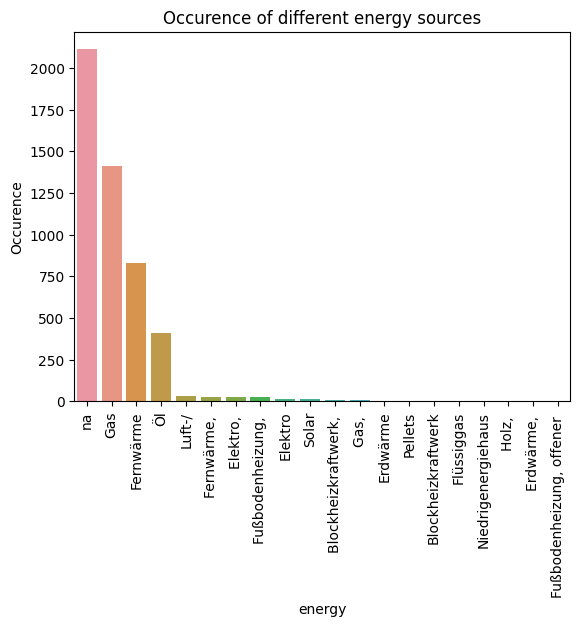

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

energy = df.groupby('energy')['price'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(data = energy, x='energy', y='price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Occurence')
ax.set_title('Occurence of different energy sources')
plt.show()

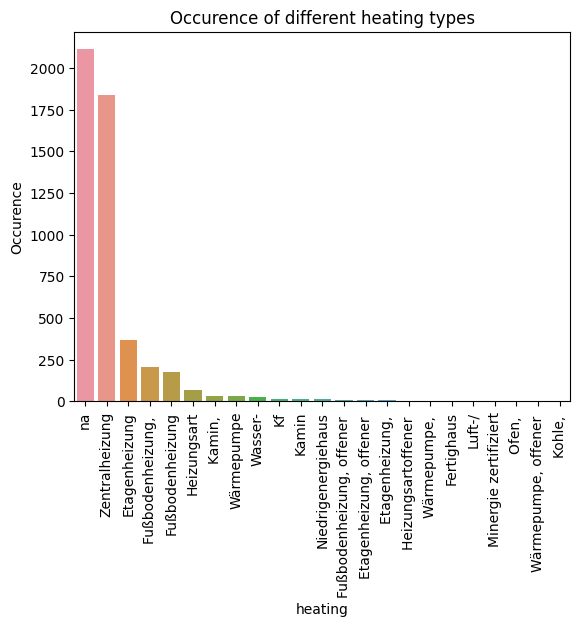

In [39]:
heating = df.groupby('heating')['price'].count().sort_values(ascending=False).reset_index()
ax = sns.barplot(data = heating, x='heating', y='price')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Occurence')
ax.set_title('Occurence of different heating types')
plt.show()

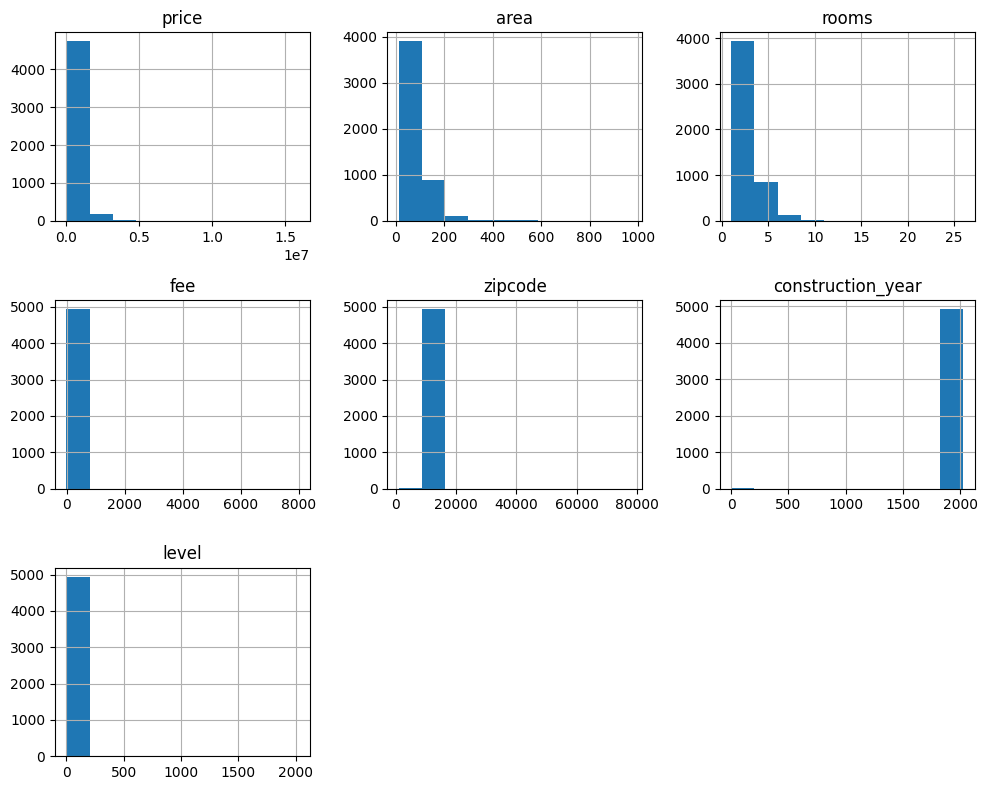

In [40]:
# Plot histograms for all numerical features
df.hist(figsize=(10, 8))

# Display the plots
plt.tight_layout()
plt.show()

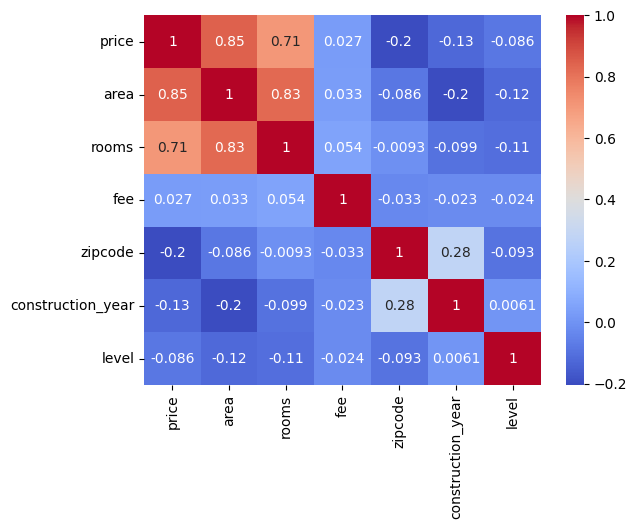

In [43]:
# Select only numerical features
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr(method='spearman')

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Display the heatmap
plt.show()

Rooms, area and price seem to correlate strongly. This is no surprise. I would have expected that zipcode is more correlated with price. Maybe correlation is not the right measure to assess the information content of this feature.

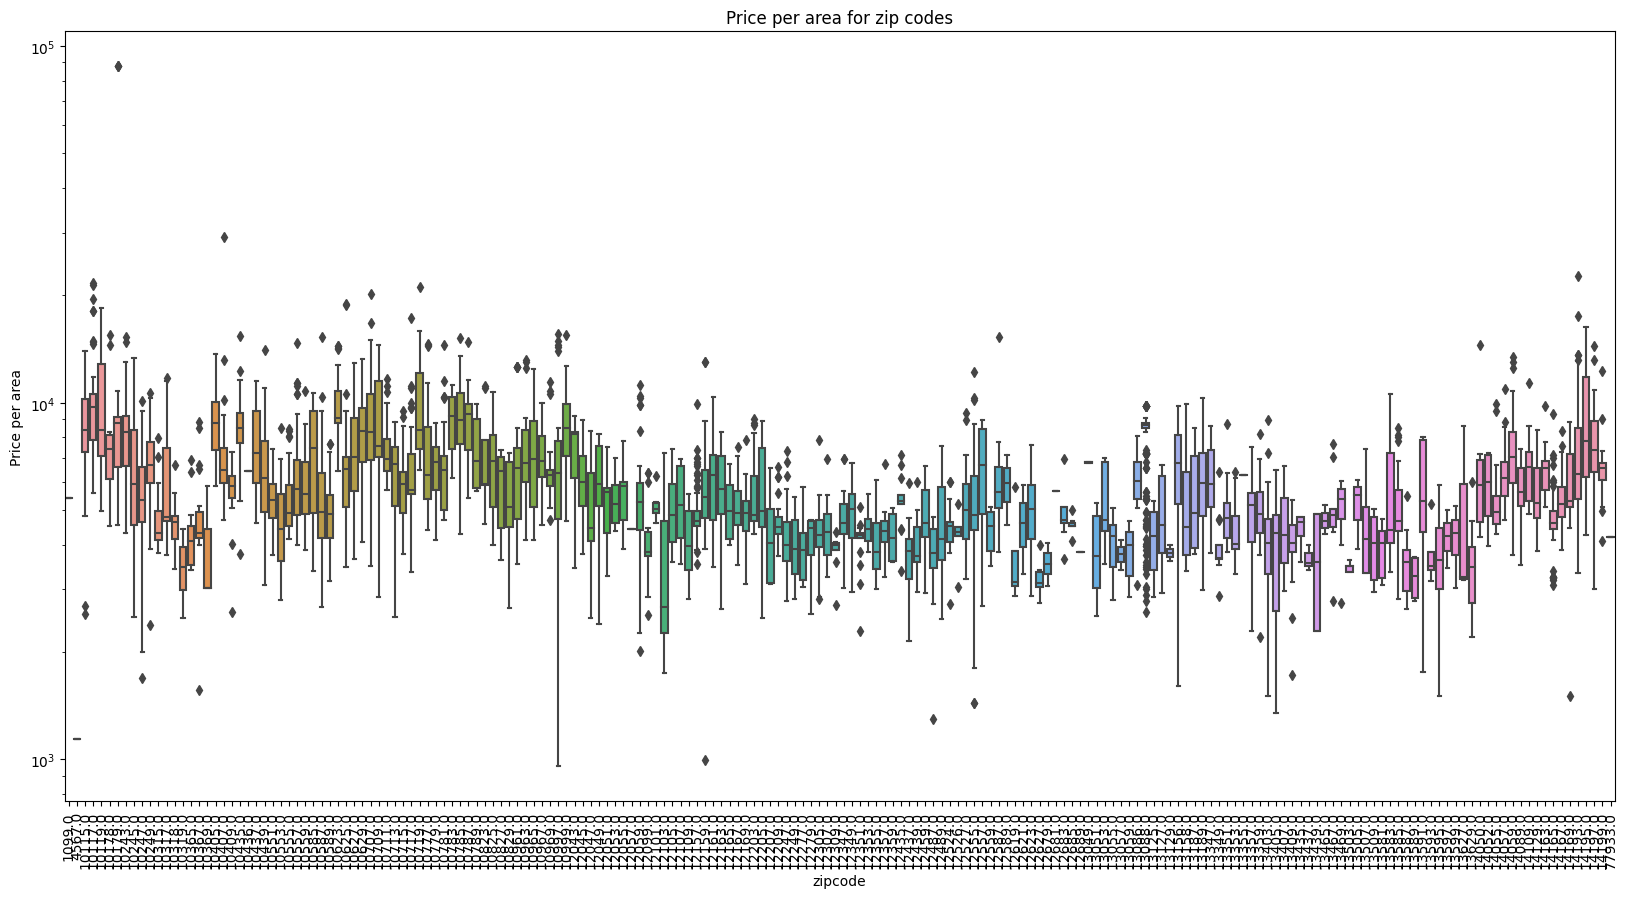

In [49]:
df['price_per_area'] = df['price'] / df['area']

fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(data = df, x='zipcode', y='price_per_area')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Price per area')
ax.set_title('Price per area for zip codes')
plt.show()

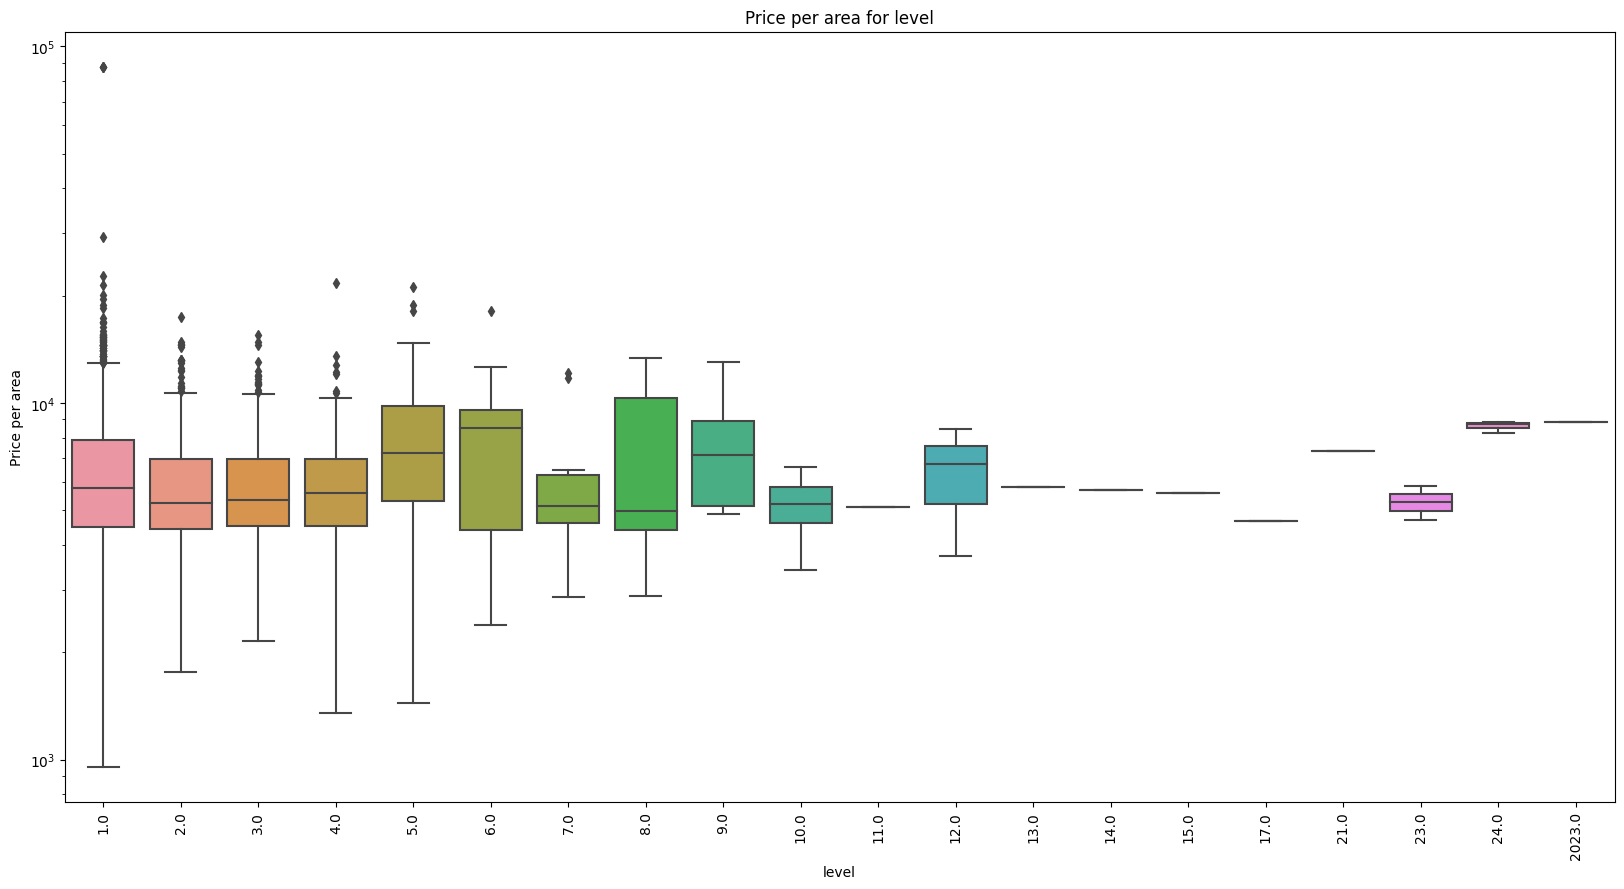

In [50]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(data = df, x='level', y='price_per_area')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Price per area')
ax.set_title('Price per area for level')
plt.show()

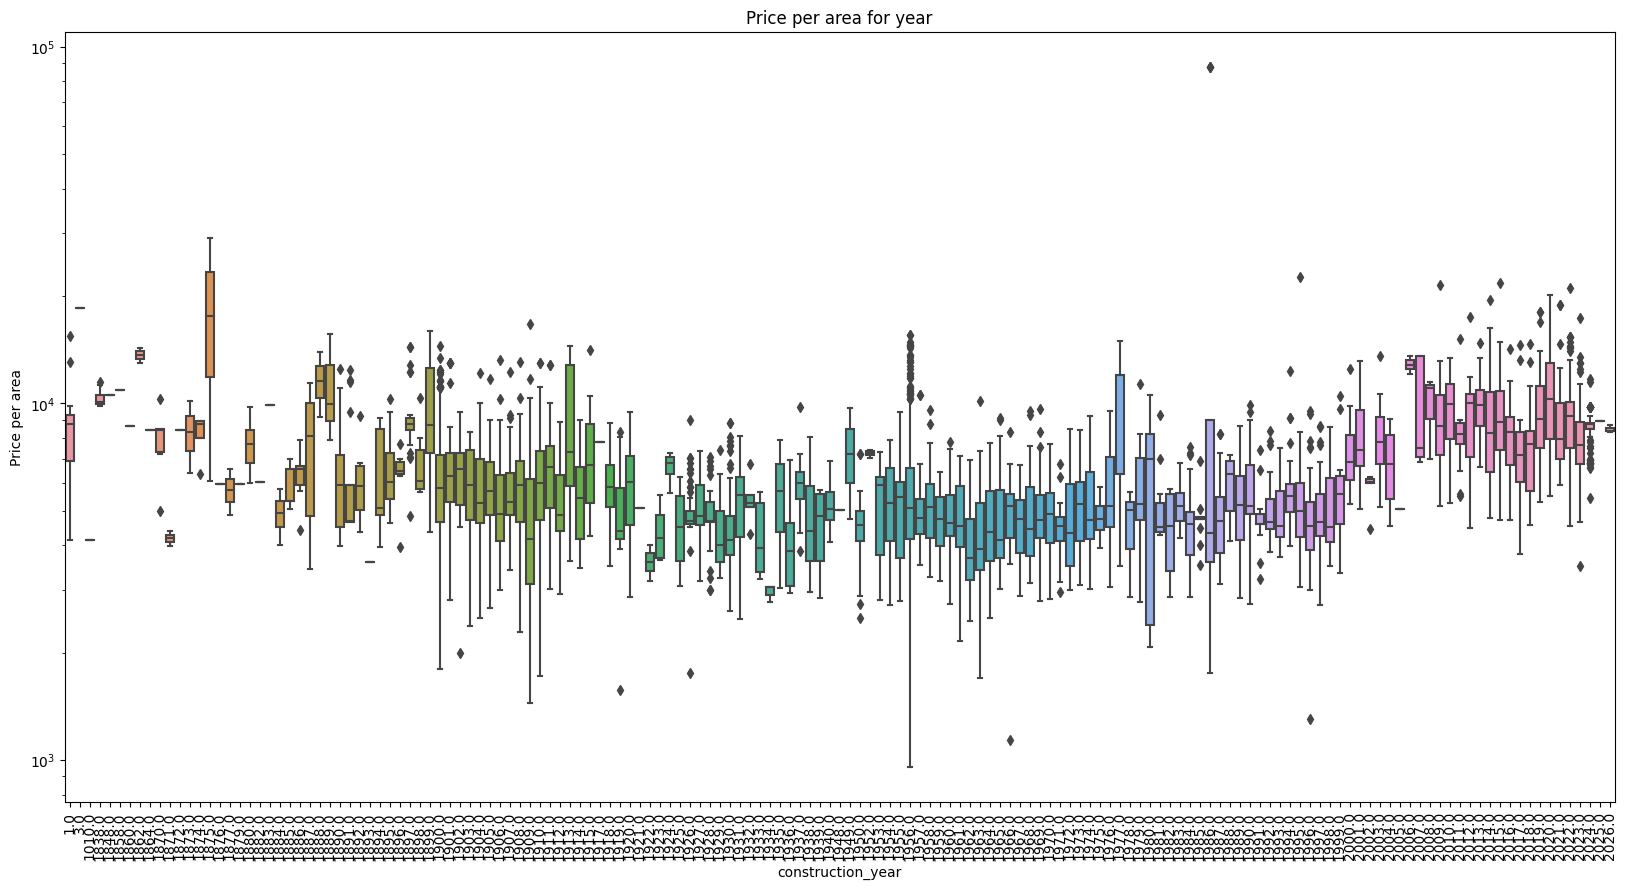

In [51]:
fig = plt.figure(figsize=(20,10))
ax = sns.boxplot(data = df, x='construction_year', y='price_per_area')
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Price per area')
ax.set_title('Price per area for year')
plt.show()